In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df_tesla = pd.read_csv("./TESLA Search Trend vs Price.csv")
df_btc_search = pd.read_csv("./Bitcoin Search Trend.csv")
df_btc_price = pd.read_csv("./Daily Bitcoin Price.csv")
df_unemployment = pd.read_csv("./UE Benefits Search vs UE Rate 2004-19.csv")

In [4]:
df_tesla.shape

(124, 3)

In [5]:
df_tesla.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [7]:
df_tesla.sort_values("TSLA_WEB_SEARCH", ascending=False)

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
123,2020-09-01,31,407.339996
113,2019-11-01,30,65.987999
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007
116,2020-02-01,23,133.598007
...,...,...,...
5,2010-11-01,2,7.066000
4,2010-10-01,2,4.368000
3,2010-09-01,2,4.082000
2,2010-08-01,2,3.896000


In [13]:
print(f"Max Value: {df_tesla.TSLA_WEB_SEARCH.max()}, Min Value:{df_tesla.TSLA_WEB_SEARCH.min()}")

Max Value: 31, Min Value:2


In [15]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [18]:
print(df_unemployment.shape)
df_unemployment.head()

(181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [19]:
print(f'Largest Value for "Unemployment Benefits" in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()}')

Largest Value for "Unemployment Benefits" in Web Search: 100


In [20]:
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [21]:
print(df_btc_search.shape)
df_btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [22]:
print(f'Largest BTC News Search Value : {df_btc_search.BTC_NEWS_SEARCH.max()} ')

Largest BTC News Search Value : 100 


In [25]:
print(f"Missing Values for Tesla ? {df_tesla.isna().any()}\n")
print(f"Missing Values for Bitcoin Search ? {df_btc_search.isna().any()}\n")
print(f"Missing Values for Bitcoin Price ? {df_btc_price.isna().any()}\n")
print(f"Missing Values for Unemployment ? {df_unemployment.isna().any()}\n")

Missing Values for Tesla ? MONTH              False
TSLA_WEB_SEARCH    False
TSLA_USD_CLOSE     False
dtype: bool

Missing Values for Bitcoin Search ? MONTH              False
BTC_NEWS_SEARCH    False
dtype: bool

Missing Values for Bitcoin Price ? DATE      False
CLOSE      True
VOLUME     True
dtype: bool

Missing Values for Unemployment ? MONTH                     False
UE_BENEFITS_WEB_SEARCH    False
UNRATE                    False
dtype: bool



In [27]:
print(f"No of missing values : {df_btc_price.isna().values.sum()}")
df_btc_price[df_btc_price.CLOSE.isna()]

No of missing values : 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [28]:
df_btc_price.dropna(inplace=True)

In [29]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

In [30]:
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


In [42]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

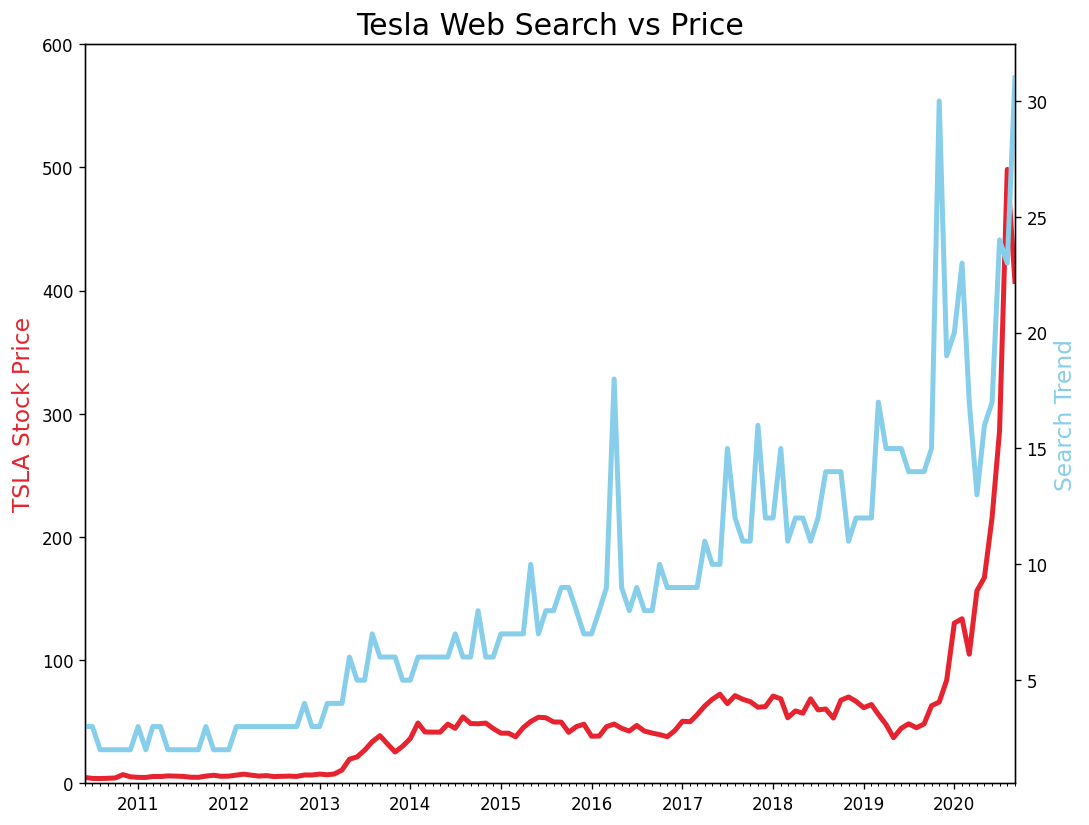

In [43]:
plt.figure(figsize=(10,8), dpi=120)
plt.title("Tesla Web Search vs Price", fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("TSLA Stock Price", color="#e6232e", fontsize=14)
ax2.set_ylabel("Search Trend", color='skyblue', fontsize=14)

ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="#e6232e", linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='skyblue', linewidth=3)

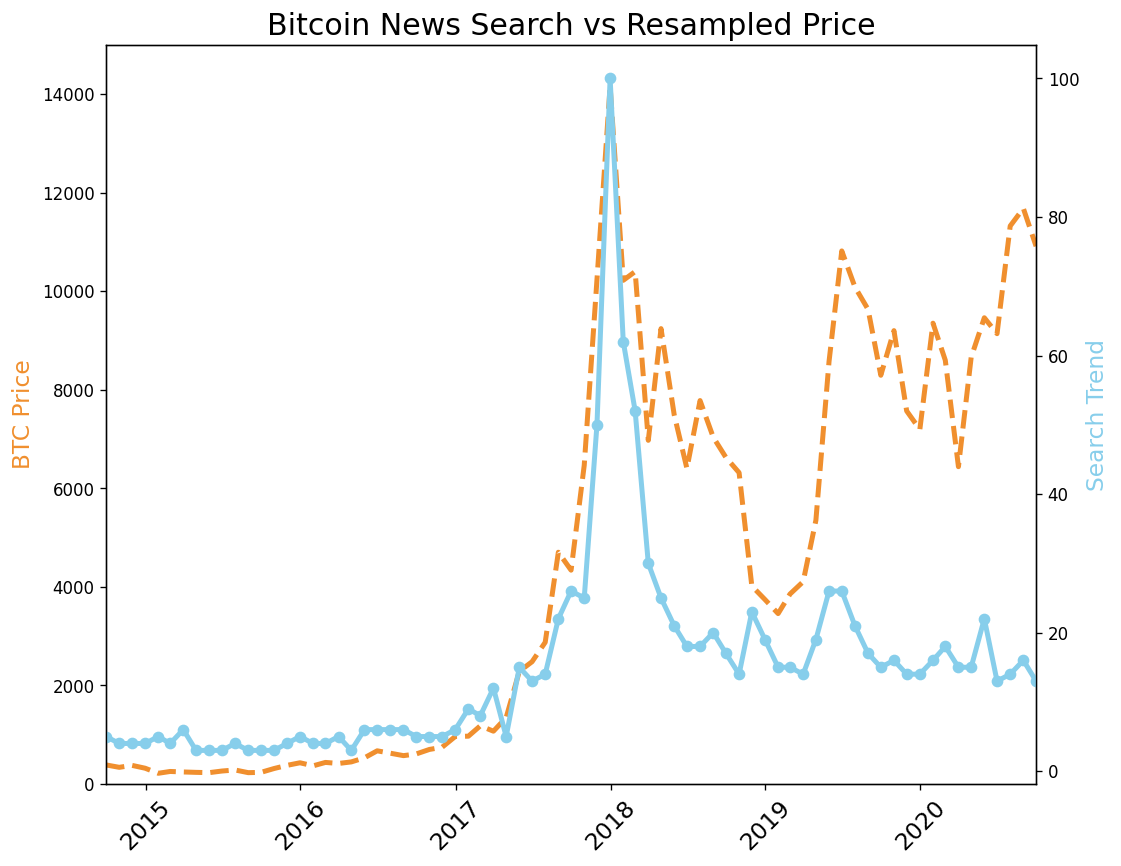

In [52]:
plt.figure(figsize=(10,8), dpi=120)

plt.title("Bitcoin News Search vs Resampled Price", fontsize=18)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color='#F08F2E', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color='#F08F2E', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color='skyblue', linewidth=3, marker='o')

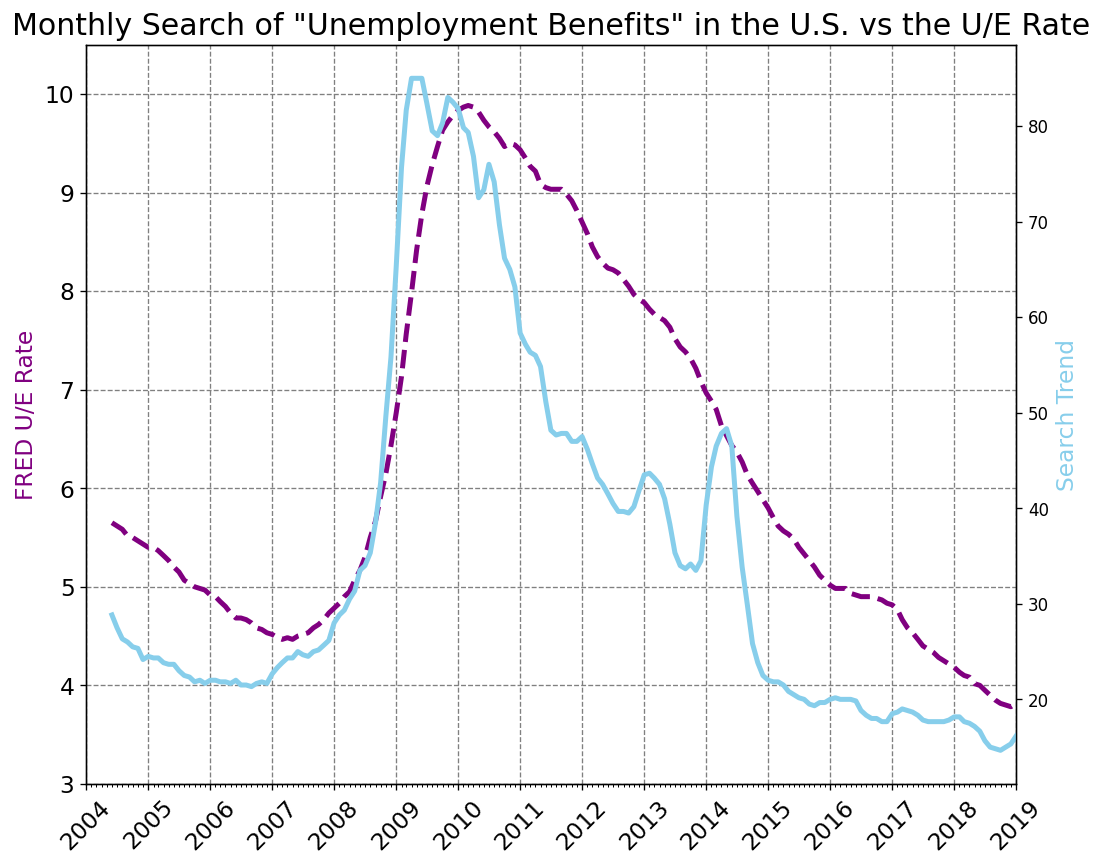

In [60]:
plt.figure(figsize=(10,8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=14)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=14)
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
 
ax1.grid(color='grey', linestyle='--')
 
# ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='purple', linewidth=3, linestyle='--')
# ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)

roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, color='purple', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, color='skyblue', linewidth=3)
 
plt.show()